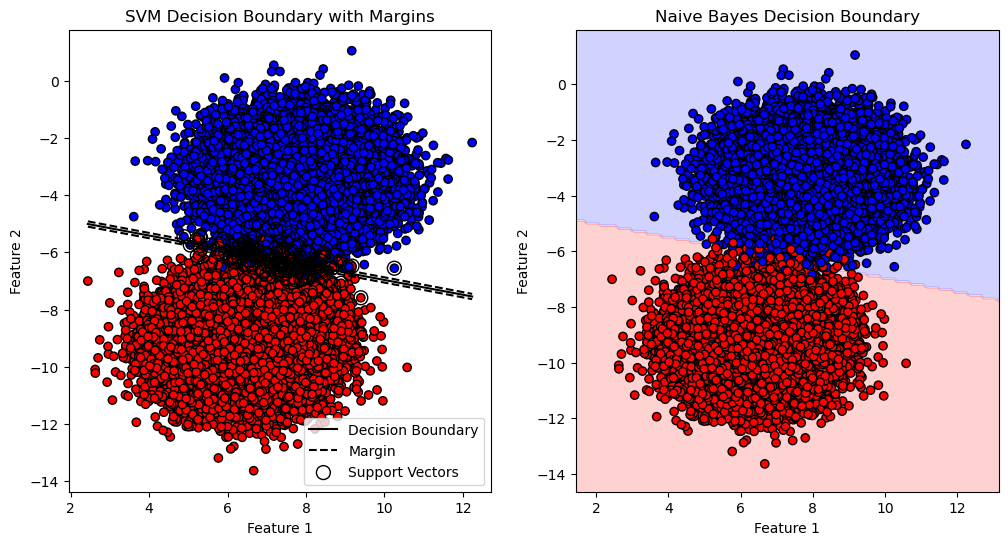

SVM Model Accuracy: 99.87%
Naive Bayes Model Accuracy: 99.88%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples=50000, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Change labels to -1 and 1 for demonstration

# SVM with a linear kernel for separable case
svm_model = SVC(kernel='linear', C=1e5)
svm_model.fit(X, y)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

# SVM decision boundary and margins
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = slope * xx + intercept
margin = 1 / np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + slope ** 2) * margin
yy_up = yy + np.sqrt(1 + slope ** 2) * margin

# Visualizing both models
plt.figure(figsize=(12, 6))

# Plotting SVM results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolor='k', label="Support Vectors")
plt.title("SVM Decision Boundary with Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Naive Bayes decision boundary
plt.subplot(1, 2, 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Naive Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Calculate accuracies for comparison
y_pred_svm = svm_model.predict(X)
y_pred_nb = nb_model.predict(X)

accuracy_svm = accuracy_score(y, y_pred_svm)
accuracy_nb = accuracy_score(y, y_pred_nb)

print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")
print(f"Naive Bayes Model Accuracy: {accuracy_nb * 100:.2f}%")
